In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

df = pd.read_csv('..\datasets\eda_data.csv')
df.columns


c:\Users\BA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\BA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [2]:
# choose relevant columns
df_model = df[['avg_salary', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'job_state', 'same_state', 'age', 'python_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len']]


In [3]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [4]:
# train test split
X = df_dum.drop('avg_salary', axis=1)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# multiple linear regression 
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

c:\Users\BA\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.55e-94
Time:                        15:43:09   Log-Likelihood:                -3311.7
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7569.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                42.9073      6.386      6.719      0.000      30.367      55.448
Rating                                                3.6540      1.933      1.891      0.059      -0.142       7.450
num_comp                                              2.2546      0.869      2.595      0.010       0.548       3.961
hourly                                              -36.5003      9.191     -3.971      0.000     -54.552     -18.449
employer_provided                                    31.6444     11.510      2.749      0.006       9.040      54.249
same_state                                            2.4887      2.619      0.950      0.342      -2.655       7.632
age                                                   0.0340      0.030      1.130      0.259      -0.025       0.093
python_yn                                             8.1506      2.524      3.229      0.001       3.194      13.107
spark                                                -0.5553      2.921     -0.190      0.849      -6.291       5.181
aws                                                   1.1244      2.737      0.411      0.681      -4.250       6.499
excel                                                -0.4014      2.270     -0.177      0.860      -4.859       4.056
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.5690      8.631      1.572      0.116      -3.381      30.519
Size_1 to 50 employees                                0.9733      6.489      0.150      0.881     -11.770      13.717
Size_10000+ employees                                -2.9502      5.799     -0.509      0.611     -14.338       8.438
Size_1001 to 5000 employees                           6.0683      3.876      1.566      0.118      -1.544      13.681
Size_201 to 500 employees                             2.1704      3.867      0.561      0.575      -5.424       9.765
Size_5001 to 10000 employees                         -3.9267      5.442     -0.722      0.471     -14.614       6.761
Size_501 to 1000 employees                            2.0074      4.048      0.496      0.620      -5.943       9.957
Size_51 to 200 employees                              4.0530      4.405      0.920      0.358      -4.598      12.704
Size_Unknown                                         20.9428     14.009      1.495      0.135      -6.570      48.456
Type of ownership_-1                                 13.5690      8.631      1.572      0.116      -3.381      30.519
Type of ownership_College / University                6.1820     17.728      0.349      0.727     -28.635      40.999
Type of ownersh

In [6]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))


-52887699.56378735

,alpha,error
12,0.13,-19.260826


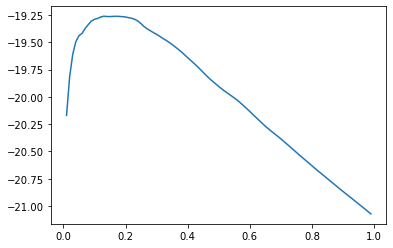

In [14]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [16]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-14.950678613546634

In [17]:
# tune models GridsearchCV
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(10, 300, 10), 'criterion': ('mse', 'mae'), 'max_features': ('auto', 'sqrt', 'log2')}

gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train, y_train)

gs.best_score_
gs.best_estimator_


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
# test ensembles
from sklearn.metrics import mean_absolute_error
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

mean_absolute_error(y_test, tpred_lm)
mean_absolute_error(y_test, tpred_lml)
mean_absolute_error(y_test, tpred_rf)

mean_absolute_error(y_test, (tpred_lm+tpred_rf)/2)


156316423.0141362

In [ ]:
# save model
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump(pickl, open('model_file' + ".p", "wb"))

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1, :])).reshape(1, -1))[0]
